In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
np.random.seed(8)

In [3]:
array  = np.random.randn(20,2)
X = np.r_[array - [3,3], array+[3,3]]
y = [0]*20 + [1]*20

In [4]:
# build the model of svm
clf =svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(50, 50)


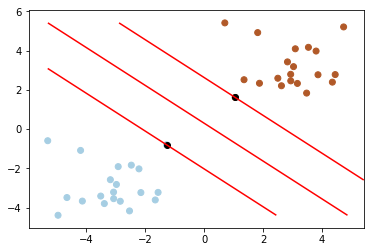

In [5]:

x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x2_max),np.linspace(x2_min, x2_max))
w = clf.coef_[0]
print(xx1.shape)
#f = w[0]*X[:, 0] + w[1]*X[:, 1] + clf.intercept_[0] + 1
f = w[0]*xx1 + w[1]*xx2 + clf.intercept_[0] + 1
plt.contour(xx1,xx2,f,[0,1,2], colors='r')
#plt.contour(xx1,xx2,f,[0,], colors='r')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],color='k')
plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D

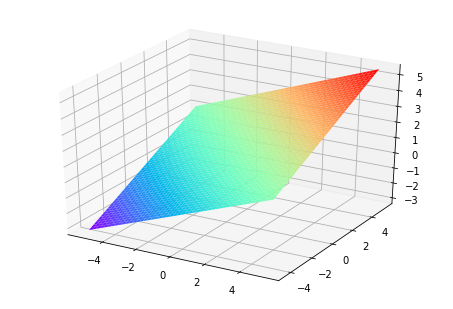

In [7]:
fig= plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx1,xx2,f,cmap='rainbow')
plt.show()

In [8]:
np.random.seed(8)

In [9]:
r = np.sqrt(np.abs(np.random.normal(size=(100,))))
r_max = np.max(r)
t = 2 * np.pi * np.random.normal(size=(100,))
data1 = np.array([r*np.cos(t),r*np.sin(t)]).T
d = np.sqrt( (r*np.cos(t))**2 + (r*np.sin(t))**2)
print(data1.shape)

(100, 2)


In [10]:
r2 = np.sqrt(3 + 6 * np.abs(np.random.normal(size=(100,))))
r2[r2 < r_max] += r_max

t2 = 2 * np.pi * np.random.normal(size=(100,))

data2 = np.array([r2 * np.cos(t2), r2 * np.sin(t2)]).T

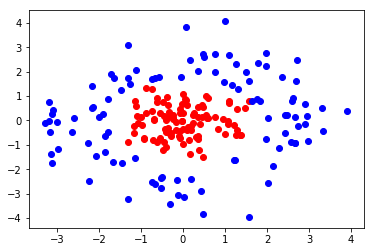

In [11]:
plt.scatter(data1[:, 0], data1[:, 1], c = 'r')
plt.scatter(data2[:, 0], data2[:, 1], c = 'b')
plt.show()

In [12]:
NL_X = np.concatenate([data1,data2])
NL_y = [0]*100 + [1]*100

In [13]:
# build the model of svm
NL_clf =svm.SVC(kernel='rbf')
NL_clf.fit(NL_X, NL_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(2500, 2)


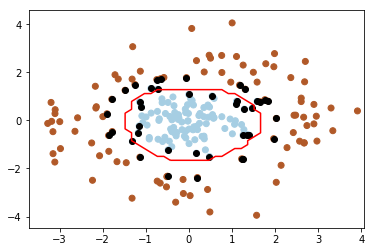

In [43]:
x1_min, x1_max = NL_X[:, 0].min(), NL_X[:, 0].max()
x2_min, x2_max = NL_X[:, 1].min(), NL_X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x2_max),np.linspace(x2_min, x2_max))
xx1_flat = xx1.flatten()
xx2_flat = xx2.flatten()
test = np.stack([xx1_flat, xx2_flat], axis=1)
print(test.shape)
f_flat = NL_clf.predict(test)
f = f_flat.reshape(xx1.shape)
plt.contour(xx1,xx2,f,[0,], colors='r')
#plt.contour(xx1,xx2,f,[0,], colors='r')
plt.scatter(NL_X[:,0],NL_X[:,1], c=NL_y, cmap=plt.cm.Paired)
plt.scatter(NL_clf.support_vectors_[:,0],NL_clf.support_vectors_[:,1],color='k')
plt.show()

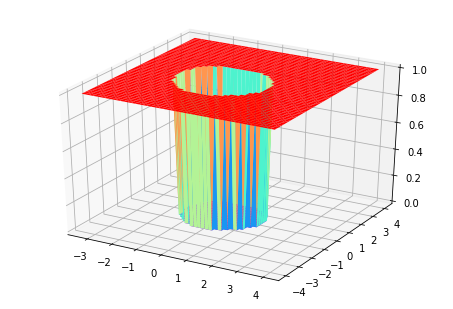

In [16]:
fig= plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx1,xx2,f,cmap='rainbow')
plt.show()

In [22]:
help(svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [26]:
from numpy.random import random
from numpy import squeeze, sqrt, pi, sin, cos, diag, ones, dot
import numpy as np
def rand(n,m):
    return random(size=(n,m))
n = 100
                # Random radii
def coordinate(r,theta):
    #r=squeeze(r)
    #theta = squeeze(theta)
    return np.array([r*cos(theta), r*sin(theta)]).T

# Random angles for Q1 Q2 Q3 Q4
r = sqrt(rand(n,4))    
t = np.pi/2 * ( rand(n,4) + dot(ones((n,4)), diag([0,1,2,3])) ) 
X_list = []
for i in range(4):
    out = coordinate(r[:,i],t[:,i])
    X_list.append(out)
# Polar-to-Cartesian conversion
NL2_X = np.concatenate(X_list,axis=0)
NL2_y = np.array( ([0]*100 + [1]*100)*2 )
print(NL2_X.shape)

(400, 2)


(400, 2) (400,)


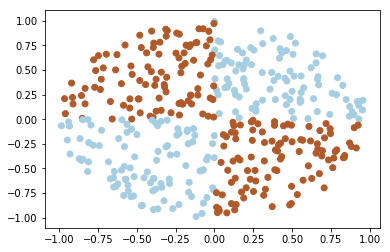

In [27]:
print(NL2_X.shape, NL2_y.shape)
plt.scatter(NL2_X[:,0],NL2_X[:,1], c=NL2_y, cmap=plt.cm.Paired)
plt.show()

In [39]:
def mysigmoid(U,V):
    gamma = 0.5
    c = -1
    G =np.tanh(gamma * dot(U,V.T) + c)
    return G

In [98]:
NL2_clf =svm.SVC(kernel='rbf')
NL2_clf.fit(NL2_X, NL2_y)
NL2_clf.support_vectors_

array([[  1.35297626e-01,   2.50246103e-01],
       [  2.70075951e-01,   1.56819397e-01],
       [  6.81186629e-02,   3.20498134e-01],
       [  2.05992573e-01,   3.05953925e-01],
       [  5.52396865e-01,   2.02608175e-01],
       [  1.93201196e-01,   5.52959386e-01],
       [  5.10215876e-01,   7.42746939e-03],
       [  7.44013141e-01,   4.83889512e-02],
       [  8.99527257e-01,   4.63242127e-02],
       [  1.49527618e-01,   7.09135388e-01],
       [  6.80484387e-02,   5.88982459e-01],
       [  1.60438168e-01,   2.25520858e-01],
       [  8.71960120e-01,   1.28561640e-01],
       [  1.90006888e-01,   4.11908355e-01],
       [  2.40154752e-02,   2.47784225e-01],
       [  7.98785651e-02,   5.98379258e-01],
       [  3.92960414e-01,   1.99597796e-01],
       [  2.78425737e-02,   5.42087853e-01],
       [  1.88921427e-01,   3.97730170e-01],
       [  1.94584282e-01,   3.57984513e-01],
       [  1.08976135e-01,   5.71164038e-01],
       [  8.37123605e-02,   3.26063644e-01],
       [  

In [111]:
def plot_contour(X,y,clf):
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x2_max),np.linspace(x2_min, x2_max))
    xx1_flat = xx1.flatten()
    xx2_flat = xx2.flatten()
    test = np.stack([xx1_flat, xx2_flat], axis=1)
    f_flat = clf.predict(test)
    f = f_flat.reshape(xx1.shape)
    plt.contour(xx1,xx2,f,[0,], colors='r')
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired)
    if  hasattr(clf,"support_vectors_"):
        plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],color='k')
    #plt.show()
    #=================================================
    fig= plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xx1,xx2,f,cmap='rainbow')
    #=================================================
    plt.show()
    return f

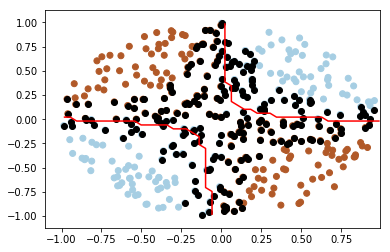

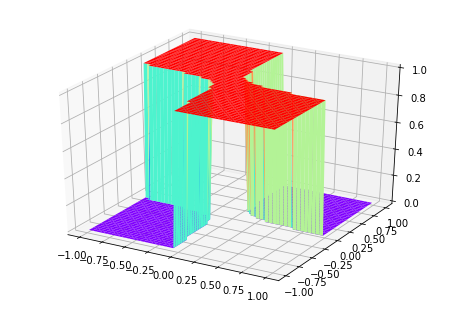

In [112]:
f = plot_contour(NL2_X, NL2_y, NL2_clf)

In [113]:
from sklearn.svm import SVC
from sklearn import grid_search
param = [
        {
            "kernel": ["linear"],
            "C": [1, 10, 100, 1000]
        },
        {
            "kernel": ["rbf"],
            "C": [1, 10, 100, 1000],
            "gamma": [1e-2, 1e-3, 1e-4, 1e-5]
        }
    ]
NL3_svm = SVC(probability=True)
NL3_clf = grid_search.GridSearchCV(NL3_svm, param,
            cv=10, n_jobs=4, verbose=3)
NL3_clf.fit(NL2_X, NL2_y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    4.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

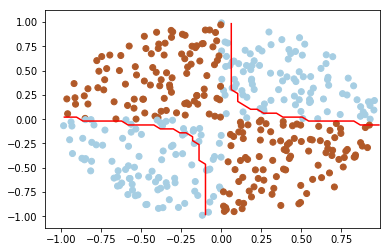

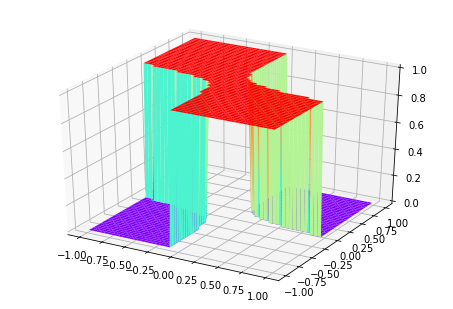

In [114]:
f = plot_contour(NL2_X, NL2_y, NL3_clf)

In [131]:
import tensorflow as tf
from tensorflow.contrib.learn import SVM as tf_svm
import pandas as pd

In [55]:
sess=tf.Session()

In [151]:
data_map ={'x%d'%i : NL2_X[:,i] for i in range(2)}
data_map.update({'label':NL2_y})
print(data_map.keys())
my_df = pd.DataFrame(data_map)
my_df.head()
print(list(my_df.columns))

dict_keys(['x1', 'label', 'x0'])
['label', 'x0', 'x1']


In [157]:
CONTINUOUS_COLUMNS = ['x1','x2']
FEATURE_COLUMNS = CONTINUOUS_COLUMNS
CATEGORICAL_COLUMNS=[]
LABEL_COLUMN = 'label'

In [158]:
def input_fn(df):
    continuous_cols = {
     k : tf.constant(df[k].values)
        for k in CONTINUOUS_COLUMNS
    }
    categorical_cols = {
        k: tf.SparseTensor(
            indices=[[i, 0] for i in range(df[k].size)],
            values=df[k].values,
            dense_shape=[df[k].size, 1])
        for k in CATEGORICAL_COLUMNS
    }
    
    feature_cols = continuous_cols.update(categorical_cols)
    label = tf.constant(df[LABEL_COLUMN].values)
    return feature_cols, label

In [163]:
from numpy import shape, zeros, matmul

In [161]:
def selectJrand(i,m):
    j=i
    while(j==i):
        j = int(np.random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if(aj>H):
        return H
    if(aj<L):
        return L
    return aj

def smoSimple(dataMat, label, C, toler, maxIter):
    '''
        dataMat   : matrix , the features matrix
        labels : array  , the labels vector of class
        C           :
        toler       : float  , the toler of loss
        maxInter    : int    , the max iter num
    '''
    label = label.astype(np.float32)
    b=0; m,n = shape(dataMat)
    alphas = np.zeros((m,1),dtype=np.float32)
    iter = 0
    while(iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = (alphas * label).T * dataMat * dataMat[i,:].T + b
            Ei = fXi - label[i]
            if ((label[i]*Ei > toler and alphas[i] > 0) or (label[i]*Ei < -toler and  alphas[i]<C) ):
                j = selectJrand(i,m) #choose another alpha
                fXj = (alphas * label).T * dataMat * dataMat[j,:].T + b
                Ej = fXj -label[j]
                alphaI_old = alphas[i].copy()
                alphaJ_old = alphas[j].copy()
                if (label[i] != label[j]):          #Make sure the Alpha is less than C
                    L = max(0, alpha[j] - alpha[j]) #
                    H = min(C, C + alpha[j] - alpha[i]) #
                else:
                    L = max(0, alphas[j] + alphas[i] -C)
                    H = min(C, alphas[j] + alphas[i]])
                if  L==H : 
                    print("L==H")
                    continue
                x1 = dataMat[i,:]
                x2 = dataMat[j,:]
                eta = 2.0 * dot(x1,x2.T) - dot(x1,x1.T) - do(x2,x2.T)
                if eta >=0:
                    print('eta>=0')
                    continue
                alphas[j] -= label[j] * (Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if(abs(alphas[j] - alphaJ_old) < 1e-5):
                    print('J not moving enough')
                    continue
                alphas[i] += label[j] * label[i] * (alphaJ_old - alphas[j]) # update i with the same value of j in negative direction
                b1 = b - Ei - label[i] * (alphas[i] - alphaI_old) * dot(x1,x1.T) - \
                              label[j] * (alphas[j] - alphaJ_old) * dot(x1,x2.T)
                b1 = b - Ej - label[i] * (alphas[i] - alphaI_old) * dot(x1,x2.T) - \
                              label[j] * (alphas[j] - alphaJ_old) * dot(x2,x2.T)
                if(0 < alphas[i] and alphas[i] < C):
                    b=b1
                elif(0 < alphas[j] and alphas[j] < C):
                    b=b2
                else:
                    b = (b1 + b2) / 2. 
                alphaPairsChanged += 1
                print("iter %d i: %d, pairs chagend %d"%(iter,i,alphaPairsChanged))
        #------end for 
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter =0
        print("iteration number : %d"% iter)
    return b, alphas

In [185]:
alphas = np.arange(5)
b = np.arange(10).reshape(5,2)

In [199]:
type(None) == type(None)

True

In [200]:
print("iter %d i: %d, pairs chagend %d"%(3,1,2))

iter 3 i: 1, pairs chagend 2


[[  0.]
 [  1.]
 [  4.]
 [  9.]
 [ 16.]]
[[  0.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.]
 [  0.   2.   4.   6.   8.]
 [  0.   3.   6.   9.  12.]
 [  0.   4.   8.  12.  16.]]


In [179]:
1+1

2